--- 正在提取关键冲突场景文本并进行情感分析 ---

▶️ 正在分析场景: 初次交锋 (文本长度: 3074 字)

✅ 图片已保存为: 歌剧_初次交锋.png


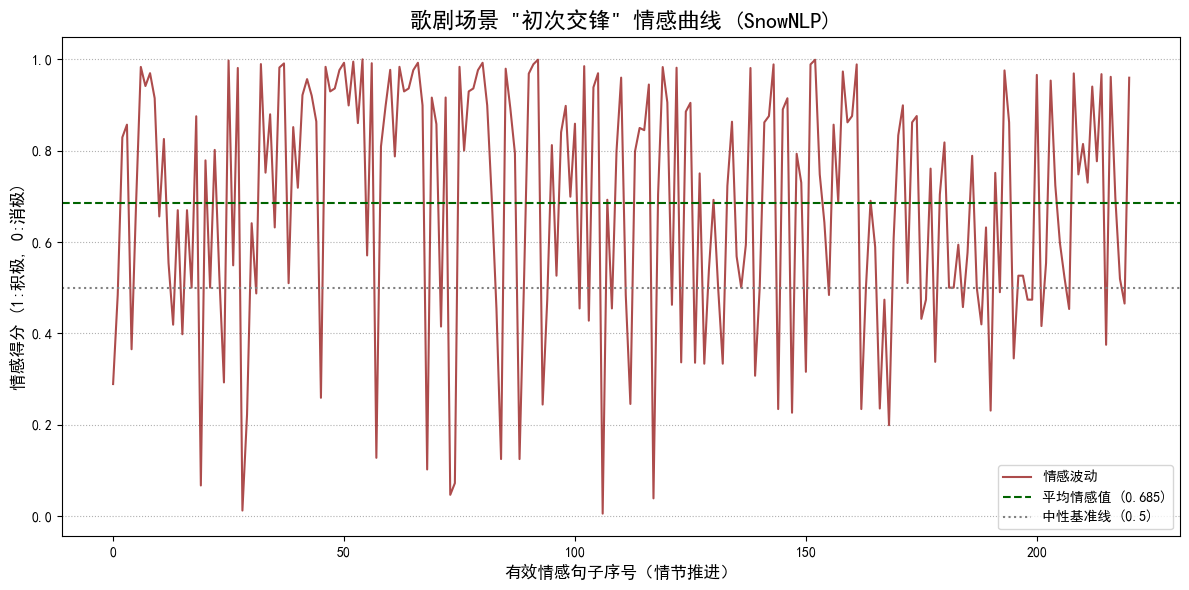


✅ 场景 '初次交锋' 情感分析结果：
   - 场景平均情感得分 (SnowNLP): 0.6852

▶️ 正在分析场景: 秘密败露 (文本长度: 1582 字)

✅ 图片已保存为: 歌剧_秘密败露.png


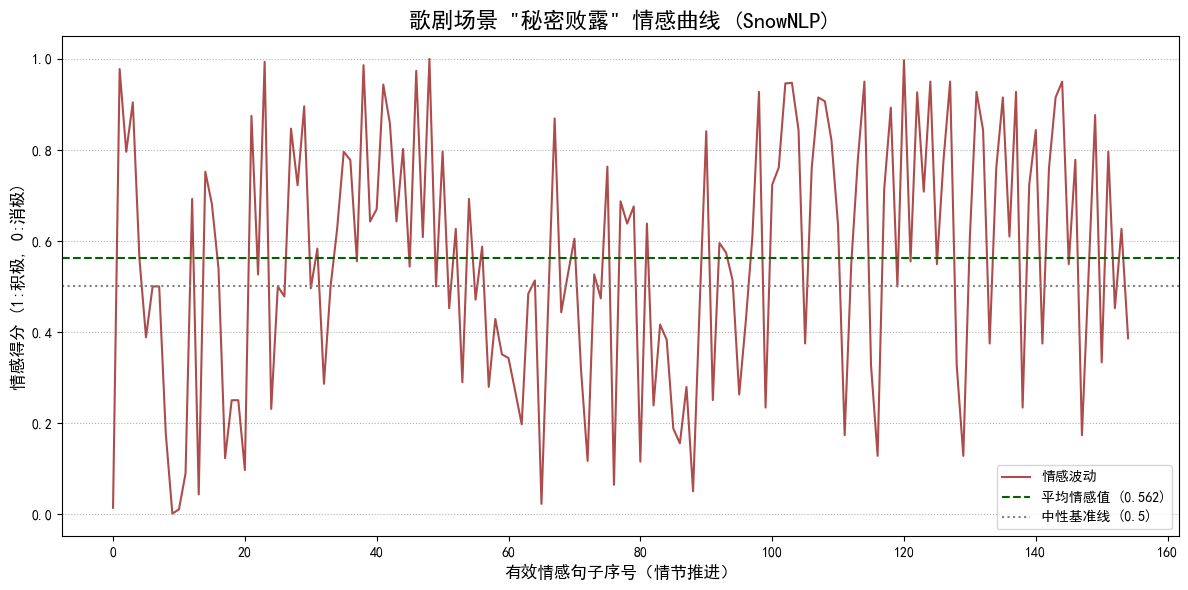


✅ 场景 '秘密败露' 情感分析结果：
   - 场景平均情感得分 (SnowNLP): 0.5619

▶️ 正在分析场景: 玛蒂尔德挽救 (文本长度: 396 字)

✅ 图片已保存为: 歌剧_玛蒂尔德挽救.png


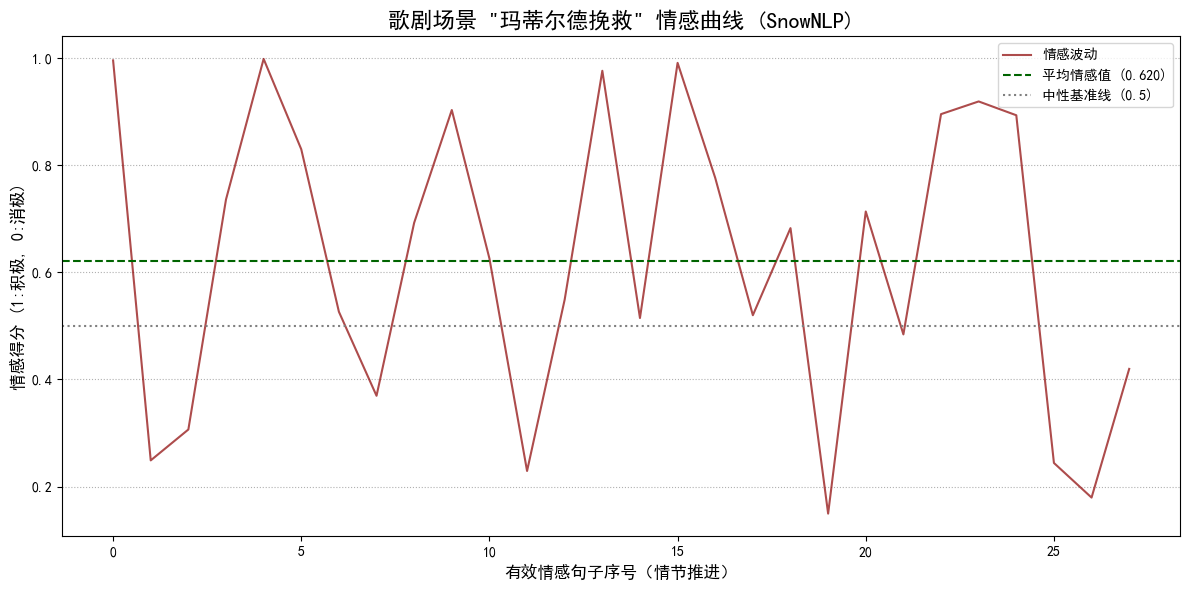


✅ 场景 '玛蒂尔德挽救' 情感分析结果：
   - 场景平均情感得分 (SnowNLP): 0.6202

✅ 场景情感分析结果已成功保存到文件: 歌剧_scene_sentiment_results.csv

--- 场景情感分析最终数据 ---
     场景名称  平均情感得分 (SnowNLP)
0    初次交锋            0.6852
1    秘密败露            0.5619
2  玛蒂尔德挽救            0.6202


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from snownlp import SnowNLP 

# ----------------------------------------------------
# 🚨 注意：将你的歌剧剧本内容赋值给 script_content 变量 🚨
# ----------------------------------------------------
script_content = """
杰罗尼莫：那个时代便是我们故事的开始
马上进入到那非红即黑的世界
红色如道道战沟中流淌的鲜血
黑色如送葬行列和沉重的祷言
准备好你的挽歌蓄满你的眼泪
生活对每个人的灵魂都是酷刑
天将降大任 天将降大任
现在是主动投身于深渊的时刻
爱情的表象向激情的煎熬变色
恐惧把我们每一天的行动鞭策
天将降大任 天将降大任
又有谁能明白心之可贵
充满爱的世间多么完美
却与人们的追求相违背
你瞧这正是问题的精髓
充满爱的世间多么完美
哪一天没有人设下重围
胆量够大世界任你高飞
听从你内心 听从你内心
那个时代沉湎于昔日主的荣光
法兰西还为如何书写未来彷徨
献身于高尚的事业乃义之所向
拥护王权还是高举革命的火把
选择阵营吧背负起相应的罪状
由理想引导的信仰是何其悲壮
天将降大任 天将降大任
在爱和死亡的夹缝中游走的你
这样方能体会何谓炽烈的感情
这两场战役的前线硝烟又燃起
天将降大任 天将降大任
又有谁能明白心之可贵
充满爱的世间多么完美
却与人们的追求相违背
你瞧这正是问题的精髓
充满爱的世间多么完美
哪一天没有人设下重围
胆量够大世界任你高飞
听从你内心 听从你内心
在爱和死亡的夹缝中游走的你
这样方能体会何谓炽烈的感情
这两场战役的前线硝烟又燃起
天将降大任 天将降大任
又有谁能明白心之可贵

杰洛尼莫：蒙伯侬女士！茫茫人海中见到您，真是惊喜啊！您不记得我了吗？杰洛尼莫！不，我不是阿帕切的厨师，我是歌者，歌者杰洛尼莫！杰洛尼莫！伟大的歌唱家杰洛尼莫！您肯定知道我，不知道吗？这是什么世道！怎么这么快就把名人忘却！不过区区两个世纪以前，我的名声还响彻巴黎、贝桑松、利摩日的各大沙龙！这是什么世道！贵族、资产阶级和贱民能平起平坐，巴黎人和外省人相提并论，你们居然相安无事！我们那个时代非黑即白，或者说....是红与黑的！
杰洛尼莫：没错，我们来聊聊爱情吧！让我来给你们介绍德瑞纳夫妇。德瑞纳先生懂得爱情吗？德瑞纳先生，是大资本家，是杜河流域美丽小城维利叶的市长。德瑞纳夫人懂得爱情吗？她的爱不是给了上帝，就是给了她的孩子们。啊，爱情啊！在这伟大而浪漫的时代，爱情被感知、被争取、被幻想着，唯独不能被成全，千载难逢。然而爱情这个无赖总是偷偷摸摸地潜伏着，在不经意间浮现，毫不安分。
瑞那夫人：不行，我不同意。
德瑞纳先生：别再说了，这件事就这么定了。让自己的夫人亲自抚养孩子，这不符合我的身份地位。我们需要一个出色的教授，这是为了孩子好。
瑞那夫人：把孩子丢给那些尖酸刻薄的老教授，动不动为了拼错个单词就要打骂责罚，这对孩子有什么好？
德瑞纳先生：你真是会瞎想。满脑子都是孩子，把你累坏了吧？你太溺爱他们了。想想看那个暴发户瓦勒诺要是知道了我们有个出色的家庭教师，会是什么反应！
瑞那夫人：家庭教师……
德瑞纳先生：当然是家庭教师。爱丽莎？他应该快到了，瓦勒诺一家正好来了。我求你好好欢迎一下他们。
瓦勒诺：市长先生好。
德瑞纳先生：瓦勒诺先生好。
瓦勒诺：德瑞纳夫人好。
德瑞纳先生：瓦勒诺夫人好，德尔万夫人好。
瓦勒诺：市长先生，您的夫人真是越发容光焕发了。
德瑞纳先生：您的夫人也是日益光彩照人。对了，这是哪来的小混混？喂，你！肯定又是个想来泡我家女仆的小流氓，我一看就知道，你等着。你找谁？
于连：我找德瑞纳先生。
德瑞纳先生：我就是，你是？
于连：我叫于连・索雷尔，是您的家庭教师。
瓦勒诺：他就是你们的家庭教师？他不是木匠索雷尔的儿子么？
瓦勒诺夫人：木匠的儿子？
瓦勒诺：木匠的儿子当老师，可真有意思。他识字吗？
于连：是的，我不仅会读书写字，还能用拉丁文读写。
德瑞纳先生：那就请您背几句拉丁文来听听吧，来吧！
于连：好吧。夫人，我看您手上有一本圣经。随便抽一段话告诉我开头的几个词，我能接着背出来。
瑞那夫人：容忍那些孩子，不要禁止他们来……
瑞那夫人：爱丽莎？
爱丽莎：嗯...
瑞那夫人：爱丽莎？
爱丽莎：什么？噢！对不起夫人，对不起夫人。
瑞那夫人：你还在想着那个人是吗？
爱丽莎：谁？噢，你说他呀？怎么可能！他看都没看过我一眼。
瑞那夫人：我觉得于连心不在焉，懵懵懂懂的，一直沉浸在自己的世界里，可能你要表现得更明显一点。
爱丽莎：还怎么明显？我都对他笑脸逢迎、低头顺眉好久了，可连半句话都说不上，他什么反应都没有。难不成要我露着大腿，把我的嫁妆绑在腿上他才明白？对不起，我失礼了。
瑞那夫人：我帮你跟他说。
爱丽莎：哦，太感谢您了！
瑞那夫人：这件事很简单，于连跟你年纪相仿、家境相似，身体健康，又在同一个屋檐下工作，我想不出他不要你的理由。
爱丽莎：确实...除非他爱着别人？
瑞那夫人：爱丽莎，别轻易说爱不爱的，我们又不是活在小说里。
爱丽莎：好吧。
瑞那夫人：是时候 静等待 悉心描绘
妆点着 准备着 这是命运
结连理 做选择 合为一体
被俘虏 被诱惑 却更哀求
那魔鬼 这毒药 吞噬你我
被罚入地狱的永恒之火
我为期望中的孩子们妥协
早已将丈夫预先视作父亲
我愿献出生命只为与他在一起
看这我的乐园
谓我心底的时钟为何？
你所见是激情或理智？
心脏可按节拍跳动？
但这腹中所孕育为何？
强大过我们 掌控世界 
钟声所奏可是幸福？
爱人啊 这小说 我正猜想
看自己 正沉沦 一同想象
为渴望 所倾覆 于无边梦中
朋友啊 我一定 费心完成
这约定 于你我 无比珍贵
我愿信 这责任 已是承诺
我早已对占据我的魔鬼臣服
哦我主 是那美德使我战胜
但这能否带我们逃脱同一悲剧
由那时间预见
谓我心底的时钟为何？
你所见是激情或理智？
心脏可按节拍跳动？
但这腹中所孕育为何？
强大过我们 掌控世界 
钟声所奏可是幸福？
主啊 宽宥我们的过错
解放我们出苦难
自女人的试炼之中
我怕 不顾一切的放纵
震颤我身 再次沦陷
在这虚假乐园
在这虚假乐园……
谓我心底的时钟为何？叮
你所见是激情或理智？
心脏可按节拍跳动？
但这腹中所孕育为何？
强大过我们 掌控世界 
钟声所奏可是幸福？

瑞那夫人：于连？
于连：夫人？
瑞那夫人：我有事找你谈，借一步说话好吗？今天天气真不错...孩子们今天早上乖不乖？
于连：他们很乖，夫人。
瑞那夫人：那就好。我希望你没斥责他们吧？
于连：没有。
瑞那夫人：那就好，你真是很会带孩子。我刚还跟爱丽莎说呢，说你肯定会是一个好父亲，她很赞同我的说法，她也很会和小孩相处。哎，这个爱丽莎还是很不错的，烧得一手好菜，做得一手漂亮衣服，我这条裙子就是她给我做的。不知道多有福气的人才能娶到她。你知道爱丽莎非常敬重你吗？我很喜欢她，你呢？你觉得她怎么样？
于连：我觉得我们应该挺合适的，可惜我得完成我的使命。
瑞那夫人：你的使命？
于连：我想成为一名教士。
瑞那夫人：你要当教士？
于连：是的，夫人。
瑞那夫人：啊，好吧，这很好，我明白，我敬佩你的选择。可怜的爱丽莎，她要伤心了。不过没关系，你是对的，如果这是你的使命，那这就是最好的选择。以你的学识和记忆力，你肯定能成为一个很好的教士。
于连：对不起，请原谅我，请允许我退下。
瑞那夫人：于连？
于连：夫人？
瑞那夫人：你的像章里藏的是谁的肖像？
于连：我请求您让我保守住这个秘密。
德瑞纳先生：你在这儿呀！脸色这么苍白。你要是能好好装扮，还是一个挺美的女人的。涂点腮红能让你的脸颊更显气色，还可以在眼睛上用一些闪亮的蓝色眼影...你知道大家都说你什么吗？我不知道怎么说才能不冒犯你——说你是个平凡的女人。人家说，市长的夫人应该是优雅、精致的楷模。你知道我不在乎别人的闲言碎语，我也喜欢你本来的样子，但人家会说是我没钱不给你买新裙子。你穿的风格有点过时了，像10年代的，现在毕竟已经是1828年了！虽然维利叶只是个外省的小城市，但正因此，我们更应该过得体面！你看看瓦勒诺夫人，她刚置备了两匹诺曼底的大马，专门用来拉她的马车，这太张扬了！她肯定是故意的，肯定是嫉妒！嫉妒我有身份，嫉妒我雇佣了于连。这个小于连，真是我的一招妙棋！不过雇佣这么个农民，花费还是太贵了。
德瑞纳先生：豪宅大庄园 仆人成群
绣花小丝帕 藏在衣柜
荣华富贵
这才是真正重要的事
雕花银勺 厚厚的地契
东西越贵 身价才越高
显而易见
这才是真正重要的事
瑞那夫人：别活在 他人的眼中
每一步 该安守本分
最重要的是
我对你忠贞不渝
德瑞纳先生/瑞那夫人：我们的诺言 不能忘却
虚无的情感 不要放纵
以上天之名
我对你忠贞不渝
不假思索 说我愿意
不论未来 是祸是福
携手努力 为琴瑟和鸣
自我欺骗 也不为不可
德瑞纳先生：穿金又带银 大权在握
奉承又讨好 收买人心
华服白手套
地位相当的朋友
股票和债券
一个都不能少
瑞那夫人：不该丢弃 珍贵的感情
日夜祈祷 今日到永恒
小心翼翼 乐于服务
我们可敬的同盟
永不违抗誓言
为孩子全力以赴
德瑞纳先生/瑞那夫人：保持希望
我们永不分离
不假思索 说我愿意
不论未来 是祸是福
携手努力 为琴瑟和鸣
自我欺骗 也不为不可
彼此真诚
对婚姻 对生意
脱帽微笑
不犯错 不让步
一丝不苟 远见卓识
小心谨慎 秉直公正
好士兵 卫道士
互相扶持
永远关心
那最重要的事
不假思索 说我愿意
不论未来 是祸是福

德瑞纳先生：露易丝？露易丝？
瑞那夫人：是，我的朋友。
德瑞纳先生：你的神色真的不太好。
瑞那夫人：稍微有些头痛，肯定是太阳晒的。
德瑞纳先生：女人真是个复杂的机器，总有些部件出问题。爱丽莎？
爱丽莎：先生？
德瑞纳先生：于连，你这个样子是要去哪呀？
于连：先生，我趁着下午有空，正好去透透气。
德瑞纳先生：那你去透气吧，我的孩子，去吧。他肯定是看上谁家姑娘了，这种事情我一下子就能察觉到。
爱丽莎：先生？
瑞那夫人：我们要去树荫下喝一杯。
爱丽莎：好的，先生。
于连：空气，空气，空气……终于清净了！哦，主啊，饶恕我吧。我并不虔诚，却这般恳求您，但我要臣服于您！您在天上，什么都看得清楚，但这人世间一片混沌，我看不懂，也看不到您的圣光，除了露易丝眼睛里的光芒。她看我的眼神，好像看着宠物，我什么都不是。不，我不要和她的女仆在一起！我要她！她！露易丝！露易丝！我又在幻想什么呢？她还不知道我是谁！但她会看到的。我已经在人生的谷底了，没什么可失去的！哦，拿破仑，请你帮助我，鼓舞我！
于连：人们常告诫我 要安于现状
特权与优待 没有你的份
你出生的那张床 不许你好高骛远
人常嘲笑我 太放肆大胆
不论怎样努力 仍被以貌取人
卑躬屈膝 不要奢望 除了弯下脊梁 你再一无是处
各有其所 各安天命 已经感激不尽
低声下气 不得奋起 浑噩度过一生
要么生而为王 要么一文不名
然而为何仍在苦路上挣扎
我要荣耀向我俯首
征服世界或一无所有
小恩小惠 小权小利 无足轻重
要意乱情迷的伤口
掌控你们脖颈上的绳
不满足于 小恩小惠 蛊惑人心
旁人常轻视我 如同脚下粪土
背负父辈之名 只有残喘苟活
从中所学会的 仍是虔心祈祷
唯有告解 唯有乞求 从未触及天空
滞留原地 禁锢被缚 无法展翅翱翔
事事称阿门 到头一场空 反而诅咒加身
命运 法律 不能使我屈服
康庄大道 别再要我践行
我会承受你们的过错 钟爱自己面前的道路
永远埋葬在身后
你们眼中愚蠢的我
我要荣耀向我俯首
征服世界或一无所有
小恩小惠 小权小利 无足轻重
要意乱情迷的伤口
掌控你们脖颈上的绳
不满足于 
小恩小惠 蛊惑人心
我要荣耀向我俯首
征服世界或一无所有
小恩小惠 小权小利 无足轻重
要意乱情迷的伤口
掌控你们脖颈上的绳
不满足于 小恩小惠 蛊惑人心
瑞那夫人：于连？出什么事了？你在这干什么？
于连：夫人...我爱您！
瑞那夫人：嘘！别说了！放开我！你疯了吗？
于连：是的，夫人，为您疯狂。
瑞那夫人：快点离开，于连，快点离开！
于连：好，我走，永远离开，你再也不会有我的消息。
瑞那夫人：快走！否则我要叫我丈夫了。于连？于连？
于连：夫人？
瑞那夫人：你的像章里到底藏着谁的肖像画？
于连：我不能说。
杰洛尼莫：爱情啊！让雄狮变成羔羊，让圣人变成浪子。爱情...多么甜蜜，多么热烈！尤其是禁忌之爱、隐秘之爱，经年累月散发着花火。
美人 我曾聊表情意
你的魅力让我一见倾心
我不幸的灵魂被你救济
我心悸动难平
你呢？
好友 我可曾告诉你
我心中火炬总被你燃起
无论我如何试图去压抑
我身躁动不已
你呢？
每当我们两相依
尽欢娱 百无禁忌
百无禁忌
敢情 这都是
爱情这字眼惹的祸
对我说 别闪躲
言情剧里缠绵段落
可惜 着了魔
不开口能叫人发疯
能不能 再重播
言情剧里缠绵段落
谎言 可否让人忘记
那些不该出口的话以及
所有深印在脑海的夜里
激情突然来袭
和你
忍让 默默痛苦以为
宽容足以阻止背叛降临
无怨无悔地把自己献祭
服下禁断的毒
和你
然而当我在你怀里
这世间 再无清明
再无清明
敢情 这都是
爱情这字眼惹的祸
对我说 别闪躲
言情剧里缠绵段落
可惜 着了魔
不开口能叫人发疯
能不能 再重播
言情剧里缠绵段落
敢情 这都是
爱情这字眼惹的祸
对我说 别闪躲
言情剧里缠绵段落
你主宰我的命运
背弃了上帝只因我爱你
对你发誓 这一生这一世
沉迷这场游戏
你怎么说？

德瑞纳先生：露易丝？
瑞那夫人：天啊，你快躲起来。
德瑞纳先生：露易丝？
瑞那夫人：我来了。
德瑞纳先生：你把自己关起来干嘛？
瑞那夫人：我……
德瑞纳先生：你怎么了？
瑞那夫人：我有点头痛。
德瑞纳先生：头痛…女人真是复杂的机器。你还没更衣打扮？露易丝！我们要迟到了。
瑞那夫人：迟到？
德瑞纳先生：我们要去瓦勒诺家参加晚宴！你快点吧，维利叶的市长应该守时。你知道那个小于连在哪吗？
瑞那夫人：小…不知道。
德瑞纳先生：这次瓦勒诺又叫我们带着他去…我有时候感觉他们就是要邀请他去表演“猴戏”，拿腔拿调地咿呀呜啦，而我才是跟班。但我也有聪明才智啊。我给你讲个我刚学会的笑话：“将军夫人濒死之时，将军温柔地握着她的手。她说：‘亲爱的，我离世之前不得不跟你坦白，我在婚姻中曾出轨两次。’‘两次？’她丈夫说，‘这没什么大不了！是跟谁？’夫人回答：‘第一次是跟你的医生，第二次是跟你的整个炮兵团！’”于连？于连？
瓦勒诺：朋友们，请跟我来，我们去用餐吧。
德瑞纳先生：露易丝，你快点！
瓦勒诺：亲爱的小于连，我们都很想你啊！能不能给大家背几段圣经呀？要用拉丁文哦！
瓦勒诺夫人：是啊！来吧！背拉丁文！
于连：请原谅我，头有点痛，肯定是因为这嘈杂的声音。
瓦勒诺：什么声音？哦，囚犯们啊，老问题了。
瓦勒诺夫人：这些可怜人！都是拿破仑的拥护者。
瓦勒诺：就是没办法让他们闭嘴。
瓦勒诺夫人：连拷打他们也不行。
瓦勒诺：除非把他们的头都砍了才行。
瓦勒诺夫人：只有断头台，否则他们还要繁殖得更多呢！
瓦勒诺：我们都习惯了，我几乎都听不到了。对于这些人我必须忍着，毕竟我是穷人收容所所长，没办法，这是我的使命。
杰洛尼莫：瓦勒诺，你真是个圣人！
瓦勒诺：啊，杰洛尼莫！你们都认识杰洛尼莫吧！请您赏脸给我们唱首小曲吧，这样就能把那些噪音盖住了，这对我们敏感的客人来说太重要了！
杰洛尼莫：如您所愿！
杰洛尼莫：富人上了战场
士兵离开了战争
最简单的乐趣
打倒庸俗的平民和糟糕的品味
衣领别上鲜花
他们的目光要穷人
躲进泥土里
别倒人胃口
这世道 不该这样
这世道是个可耻的错误
我们所有的缺点
都丑的没有风度
他们高高在上的告诉我们
做富人真好（当个富人）
生在丝绸堆里（上好的丝绸）
财富傍身
幸福美满 仁义道德
无所畏惧
更好的岁月
黄金岁月
生儿育女
聪明漂亮
不费吹灰之力
穷人置身苦难中
阔佬们却不屑一顾
我们零落的人生
还不比不过他们小小的欲望
仰望上帝天父
以华服之名
他们虔诚向上帝天父祷告
还要祈祷生活更加甜美
他们 贪得无厌
穷人 一文不值
坦白说吧
你们就是次等生物
他们高高在上的告诉我们
做富人真好（当一个富人〕
生在丝绸堆里（上好的丝绸）
财富傍身
幸福美满 仁义道德
无所畏惧
更好的岁月
黄金岁月
生儿育女
聪明漂亮
不费吹灰之力
抢夺富人的面包
填饱肚子
多么庸俗
多没教养！
偷走富人的金钱
遮寒取暖
多么庸俗！
多没教养！
多么庸俗！
多没教养！
多么庸俗！
多没教养！
瓦勒诺：太棒了！
瓦勒诺：杰洛尼莫！唱得太好了！我还没听过这首歌，它出自哪里？
杰洛尼莫：不过是首老掉牙的歌了。
瓦勒诺：当然，当然。杰洛尼莫？
杰洛尼莫：嗯？
瓦勒诺：您献唱过各大贵族沙龙，杰洛尼莫是来自巴黎上流社会的艺术家！您认识所有人，所有有地位的人！您能不能带我融入那个圈子，把我引荐给几个男爵？
杰洛尼莫：亲爱的瓦勒诺先生，这是我的荣幸！我听说德拉莫侯爵正在找秘书，您感兴趣吗？
瓦勒诺：哈哈哈！杰洛尼莫！我们久仰德拉莫家族的名声，可我不确定他们的财富能多到让我去当秘书的程度。你们知道我们现在喝的酒有多贵吗？看我们的小于连的表情！这孩子话不多，不知道的还以为他只说拉丁文呢！
于连：我钦佩得说不出话来。
瓦勒诺：是吗？
于连：钦佩您管理穷人还能发财的本事！
杰洛尼莫：好极了！好极了！瓦勒诺，你识人的眼光真好！敬友谊！敬爱情！敬智慧！
德瑞纳先生：对了！你们听说过那个跟整个炮兵团出轨的女人的故事吗？没有？是这样的：一个将军温柔地拉着...
瑞那夫人：对不起，我有点头痛。
瓦勒诺：亲爱的夫人，那您去透透气吧。如果您想稍事歇息，旁边有个蓬巴杜厅，是照着真迹复制的，我陪您去。
瑞那夫人：不用了，谢谢。
德瑞纳先生：女人啊！哎，我说到哪了？哦对！一个将军，正临死...
瑞那夫人：我恳请你们原谅我，我头实在是痛！
德瑞纳先生：怎么还像传染病一样！一个将军，正临死...不不不，反过来，他的夫人正在临死...
瓦勒诺：夫人，您看起来有些不安。希望今晚我没说什么、做什么让您不开心的事，如果是我的错，我恳请您原谅我。您看起来很困扰，不知道我能做些什么，要知道您可以信任我，把我当作朋友...
瑞那夫人：谢谢您了。我没什么，只不过...我想是因为我的胸衣有点紧了。
瓦勒诺：我可以帮您松开一些，这样您就能呼吸顺畅了。啊，露易丝，您让我疯狂。
别人：尊敬的市长先生，我带着沉痛的心情告诉您这个消息：您的夫人跟于连・索雷尔有私情，就在您自己的屋檐下！我希望您能理智看待这件事，尽管它如此荒唐，而您又身处其中。我的消息来源非常可靠。
德瑞纳先生：豪宅大庄园，仆人成群！啊，爱丽莎，我看起来怎么样？这是新的市长绶带。爱丽莎？
爱丽莎：在，先生？
德瑞纳先生：去把德瑞纳夫人找来，立刻去！她怎么可能...露易丝，居然跟个农夫的儿子...我要赶走他们！我要把他们俩都赶走，像赶...我要赶走他们！我要把他们俩都赶走，像赶...哦，不行，如果他们一起逃走，报纸上又要议论个没完了！保持冷静，我要杀了她！我的名誉不会受损，法律也会站在我这边，但她姨妈的遗产怎么办？就快到手了！她要是就这么死了就好了！她怎么能对我做出这种事？她跟我在一起什么都不缺，我不懂！等着瞧吧！他们等着瞧吧！我不会任这脏水泼到我身上！我要让他们瞧瞧我是谁！这就是问题所在！
我谦卑地承认
为了权势恩惠
我装模作样
表面善交
内心不齿
口是心非
虚伪做作 却受益匪浅
哗众取宠 但充满真诚
微笑不语
闷声发你们的大财
小道消息
也能卖出价值连城
仁义道德
让你们迷失
背信弃义
成就我的非凡
我是懦夫 又怎样?
你看不见时
我默默强大
权谋是我的天赋异禀
是 我是懦夫
被无尽的悔恨吞噬
我才不要立什么牌坊
只要微笑着跟随欲望
我已沉沦
走进无尽财富的天堂 / 在无尽财富的天堂
狼吞虎咽
你要我怎么改变
习惯了旁门左道
说谎更不假思索

德瑞纳先生：露易丝...露易丝
瑞那夫人：你叫我？
德瑞纳先生：拿去！自己看！
瑞那夫人：厚颜无耻！立刻把于连索雷尔给我叫过来！他怎么敢！这农夫的儿子！不知天高地厚！竟敢诽谤我这样的女人！
德瑞纳先生：你
瑞那夫人：你别说了，我什么都不想听！有人要毁了我的名誉，你的名誉也要受损的！我早就告诉过你了！我们要什么家庭教师！不过是个到处吹嘘自己勾引市长夫人的无赖！他以为自己是谁？我要你马上把他送回他的田野里去。你要果断点啊！我们不能让这种老鼠屎坏了我们的粥。您来啦。索雷尔先生，我们不得已要跟您分别了。其中缘由我想您自己清楚。今天早上就请您收拾您的物品，我不想再见到您。永远也不要。快点！让我们摆脱这个...农夫。我不想再忍受她了。快点！把他的工钱结了。这个月的都给他！
德瑞纳先生：但...
瑞那夫人：别让他有理由说我们小气。结了他的工钱，送他回农场。等等...不！恰恰相反，别再给他机会玷污你的名声。应该把他送的远远的。要么送去巴黎吧。拉莫尔侯爵不是正在找秘书吗？那就把他推荐去当秘书吧！这样我们就能避免这桩对你的诽谤了！去吧！现在让我一个人待一会！于连...于连。
热情已经消散
仇恨尚在雏形
承诺都被抹去
誓言渐渐淡去
心间疼痛消散
天上没有一丝光亮
消逝的光辉
强加的虚饰
暴露于欲望之下
时间抨击着
被撕裂的伪装
背叛的思想变得模糊不清
随意弄错的梦
尚未筑成
漆黑中我看到一抹艳红
痛苦如此难熬
当阴影接踵而来
残酷鄙俗中我看到了希望与激情
抹掉使我
狂怒的侮辱
你形象的明暗对比
是构图的不公
我们的清晨
在没有未来的黑夜中降临
褪色的画面
在博物馆将我吞噬
悔恨萦绕浸没我周身
残酷鄙俗中我看到了希望与激情
痛苦如此难熬
当阴影接踵而来
残酷鄙俗中我看到了希望与激情
抹掉使我
狂怒的侮辱
热情已经消散
仇恨尚在雏形
强加的虚饰
暴露于欲望之下
时间抨击着
被撕裂的伪装
热情已经消散
仇恨尚在雏形
承诺都被抹去
誓言渐渐淡去
强加的虚饰
暴露于欲望之下
时间抨击着
被撕裂的伪装
残酷鄙俗中我看到了希望与激情
痛苦如此难熬
当阴影接踵而来
漆黑中我看到一抹艳红
忘掉背叛
我激情的色彩
在暗夜中耀眼
你要我怎么改变
习惯了旁门左道
说谎更不假思索

于连：她以为能把我丢掉，像个玩腻了的旧玩具。 连个解释都不给。她以为能用秘书职位买下我的缄口不语。可我不是个物品！金钱买断不了一个一无所有的人。我要向她证明我比她更有价值，她这个大资产家。我也许渺小，但绝不低贱！我什么都不会说，永远不！我连想都不会再想她！删除她，忘记她。结束了。再也不碰女人，再也不会动情我心已碎。碎了更好。我再也不会被它左右了
晚上好，您好吗？
天气真好不是吗？
今年冬天一点也不冷
这些客套话
那我发会呆吧
你继续说，我打个盹
大家都没其他好说的
来唤醒欲望
啊，好无聊，好无聊，这些优雅的人儿
他们爱我也让我厌倦
到无以复加
好无聊，好无聊，所有这些佳偶
礼貌之下
毫不高贵
他们觉得要说话得体
不会跟我说他们的所思所想
我的价值
和我的付出对等吗？
尽说些舞会的破事
继续说啊，很有趣（此处为客套话）
我很清楚他们期望什么
在各种礼节的背后
啊，好无聊，好无聊，这些美丽的人儿
他们爱我也让我厌倦
无以复加
好无聊，好无聊，...

瓦勒诺：这个粪坑里生出来的小毛头，等着瞧吧。我会把他踢回粪坑去的！很快！快到他不敢想象我还押上韵了。尊敬的侯爵先生，我是来自小城维利叶的穷人收容所所长。 
拉穆尔侯爵：维利叶，一定是小于连的朋友吧！ 
瓦勒诺夫人：他可喜欢我们了我得向您提个不情之请，我们目前重修孤儿院差了好多钱，不得不来请求您慷慨解囊，让我们孤儿院的孩子们能够这些事就直接找我的秘书兼财务索雷尔先生吧。我一看到数字就头大。失陪了。 
瓦勒诺：看到数字就头大？我看是钱多烧着了那就让我来排忧解难！ 
玛娣儿特：先生您好！ 
于连：小姐好！我能为您做些什么？ 
玛娣儿特：我找不到维利写的法国诗了。 
于连：在这里 
玛娣儿特：你能向我推荐一些有意思的书吗？整个藏书阁您都了如指掌 
于连：当然！我向您推荐拉风丹寓言 
玛娣儿特：不必了。 
于连：是不是太深刻了？ 
玛娣儿特：你有拿破仑的书推荐吗？要知道我已经读过了，圣赫勒拿到回忆录和战争论， 
于连：你读过，你在服丧？ 
玛娣儿特：我的确读过这些作品！崇敬伟大的人物，不论他们政见如何，我在为我们家族最伟大的人服丧。博尼法斯.德拉莫今天是他的祭日。 
于连：他都死了300年了！那又如何？我要纪念他，每一年都要回顾他的事迹！ 
于连：他就是因为背叛皇帝而被砍头的那个人吗？他更是个勇敢的楷模，一个英雄。也是那个时代最英俊的男子！ 
玛娣儿特：《与您相伴的时光》 
于连：什么？ 
玛娣儿特：我没有生在那个时代，今日已经没有真正的伟人了，拿破仑根本比不上 
于连：拿破仑比不上？他让整个法兰西重获骄傲！玛蒂尔德：什么骄傲，他是个实实在在的自大狂小矮子。吃香喝辣，最后安地老死在自己的床上！于连·惨烈的死亡就能抬高人的身价？那你要是死了，是不是也更值钱？ 
玛娣儿特：你在威胁我吗？ 
于连：我祈求您的原谅。 
玛娣儿特：凌晨1点到花园来，到井旁取花匠的梯子，靠在我房间的窗台上爬进来，我有话跟你说。 
于连：她们把我当猎物吗 不停盘旋在我身旁 她们到底要什么 她们到底要什么 要我服下剧毒吗 这些蛇蝎美人 她们到底要什么 她们到底要什么 她们挑衅我的软弱 残存的理智 放过我 放过我！ 远离她们 我的理想 飞得更高 飞得更高 远离她们 我得已保命 重新呼吸 重新呼吸 远离她们 远离她们 要把我放在巢穴里吗？ 来填满她们的胃口 她们到底要什么 她们到底要什么 这些雌性败坏了 动物世界的法则 她们到底要什么 她们到底要什么 
她们的爱若即若离 不过是猎人的诡计 放过我 放过我 远离她们 我的理想 飞得更高 飞得更高 远离她们 我得已保命 重新呼吸 重新呼吸 远离她们！ 呼吸 呼吸 远离她们 远离她们 呼吸 呼吸 远离她们 我的理想 远离她们 我得以保命 远离她们 我的理想 飞得更高 飞得更高 远离她们 远离她们 玛娣儿特：你在找什么吗？ 
于连：没有你的房间很不错。 
玛娣儿特：谢谢你在颤抖。 
于连：我没有颤抖，只不过打个寒颤。 
玛娣儿特：今天整个下午天气都很棒，但晚上还是很凉。 
于连：是啊，但这些霜寒之夜预示着一个繁盛的春天！ 
玛娣儿特：当然，夏天也一定温柔怡人。你把我当什么人？！ 
于连：我以为... 
玛娣儿特：你以为什么？ 
于连：以为你对我...那这幽会！ 
玛娣儿特：不错，但我改变主意了。女人很多变的，晚安吧，先生！请从窗户出去。他跟别人一样，甚至还是个穷光蛋。 
玛娣儿特/于连：本该知足 他若即若离的距离 本该知足 他口是心非的话语 雾里看花 看我们之间不解的谜 我已知足 曾轻率大胆地试探 我已知足 坦露我冷漠的内心 让她疑心重重 让她心灰意冷 我是你的谁 你为何喜欢...

有其父 必有其女 我为你编织一场梦境 瑰丽未来愿你不会醒 家族姓氏照耀你一生 你永远 别想抹去 我期望的他乃一位人中英豪 能在我走之后真正让你过得好 做你的依靠 会珍藏 你微笑 而你 最好 听仔细 所有付出 再付出也于事无补 当你不再需要为父的指引 所有怨气 随我们的亲情远离 若你宁愿选择陌生人陪你 所有付出于事无补 你得知道 所有付出 我的付出于事无补 当你不再需要为父的指引 所有怨气 随我们的亲情远离 若你坚持那我只好放弃你 可是只要我还没咽气 我的孩子我守护到底 我总会原谅你的一切 我的心肝 我骨血 玛娣儿特：父亲，不要，除非你先杀了我！ 
瑞那夫人：侯爵先生，处于神圣的宗教信仰以及道德义务，我必须忍痛告诉您，,于连-索雷尔先生是一个毫无宗教准则的人，他成功的手段，就是勾引一家中最有影响力的女人，披着不问世事的羊皮，念上几句拉丁语，他唯一的野心其实就是摆布一家之主，得到他的财富。 
玛娣儿特：亲爱的，昨天带给你水果吃了吗？你得吃饭，才能恢复体力。明天！明天就要面对审判员了。你别担心，律师跟我说他很有信心，他会为你辩护，你不过是荣誉受辱而一时冲动。这也是事实，我也会为你作证。于连？你怎么不听我说话
于连：恩？恩，很好，就听你的。
玛娣儿特：我还私下见过陪审团主席，他会站在我们这边的。
于连：玛蒂尔德，你花了多少钱？！
玛娣儿特：钱不重要！审判就是场战争，我们必须要赢。想想我肚子里的孩子。
于连：一场只有一个受害者，却万劫不复的战争。
玛娣儿特：别说了！别再自怨自艾了！的确是有受害者，可却没有人死亡。我还没跟你说，她没死，她还活着。
于连：她还活着？玛蒂尔德？
玛娣儿特：于连，德瑞纳夫人还活着。我得走了，我的天使，相信我。
于连：露易丝死了，世界崩塌，而露易丝活着，是爱情在对我谴责（唱）
法官：现在请辩方发言，有请
于连：请您允许我来为自己辩护
法官：那就请...
"""
# ----------------------------------------------------

# --- 1. 设置绘图参数 ---
# 设置中文显示，防止 Matplotlib 乱码
plt.rcParams['font.sans-serif'] = ['SimHei', 'FangSong'] 
plt.rcParams['axes.unicode_minus'] = False 

# --- 2. SnowNLP 情感计算函数 ---
def calculate_sentence_sentiment_snownlp(text):
    """使用 SnowNLP 计算情感得分 (0 到 1 之间)"""
    if not text: 
        return None
    s = SnowNLP(text)
    return s.sentiments

# --- 3. 分析、绘图并保存函数 ---
def analyze_and_plot_scene(scene_name, text):
    """分析文本情感并绘制曲线，保存为PNG文件。"""
    if not text or len(text) < 50:
        print(f"无法分析场景 '{scene_name}'，文本太短或为空。")
        return None

    # 按句切分
    sentences = re.split(r'[。？！；\n]', text) # 额外添加 \n 来更好地处理剧本换行
    scores = []
    
    for sentence in sentences:
        if sentence.strip():
            score = calculate_sentence_sentiment_snownlp(sentence.strip())
            if score is not None: 
                scores.append(score)
    
    if not scores:
        print(f"场景 '{scene_name}' 中未分析到任何有效句子。")
        return None

    avg_score = np.mean(scores)
    
    # 绘图可视化
    plt.figure(figsize=(12, 6))
    plt.plot(scores, label='情感波动', color='darkred', alpha=0.7)
    plt.axhline(avg_score, color='darkgreen', linestyle='--', label=f'平均情感值 ({avg_score:.3f})')
    plt.axhline(0.5, color='gray', linestyle=':', label='中性基准线 (0.5)')
    
    plt.title(f'歌剧场景 "{scene_name}" 情感曲线 (SnowNLP)', fontsize=16)
    plt.xlabel('有效情感句子序号（情节推进）', fontsize=12)
    plt.ylabel('情感得分 (1:积极, 0:消极)', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle=':')
    plt.tight_layout()
    
    # 🚨 关键步骤：保存图片文件
    image_filename = f"歌剧_{scene_name}.png"
    plt.savefig(image_filename, dpi=300) # 保存为 PNG 格式，300dpi 确保高分辨率
    print(f"\n✅ 图片已保存为: {image_filename}")
    
    plt.show() # 在 Notebook 中显示图表
    
    print(f"\n✅ 场景 '{scene_name}' 情感分析结果：")
    print(f"   - 场景平均情感得分 (SnowNLP): {avg_score:.4f}")
    
    return avg_score 

# --- 4. 文本提取主流程 ---

# 定义三个冲突场景的起始和结束文本标记
scene_markers = {
    '初次交锋': {
        'start': "于连：我找德瑞纳先生。", 
        'end': "不满足于 小恩小惠 蛊惑人心"
    },
    '秘密败露': {
        'start': "别人：尊敬的市长先生，我带着沉痛的心情告诉您这个消息：您的夫人跟于连・索雷尔有私情，就在您自己的屋檐下！", 
        'end': "于连：她以为能把我丢掉，像个玩腻了的旧玩具。"
    },
    '玛蒂尔德挽救': {
        'start': "玛娣儿特：亲爱的，昨天带给你水果吃了吗？", 
        'end': "法官：那就请..."
    }
}

scene_results = [] 
print("--- 正在提取关键冲突场景文本并进行情感分析 ---")

try:
    for scene_name, markers in scene_markers.items():
        start_index = script_content.find(markers['start'])
        end_index = script_content.find(markers['end']) + len(markers['end'])

        if start_index == -1 or end_index == -1:
            print(f"❌ 警告：无法在剧本中找到场景 '{scene_name}' 的完整标记。跳过。")
            continue
            
        # 提取场景文本
        scene_text = script_content[start_index:end_index]
        
        print(f"\n▶️ 正在分析场景: {scene_name} (文本长度: {len(scene_text)} 字)")
        
        # 分析、绘图并返回得分
        avg_score = analyze_and_plot_scene(scene_name, scene_text)
        
        if avg_score is not None:
            scene_results.append({
                '场景名称': scene_name,
                '平均情感得分 (SnowNLP)': round(avg_score, 4),
            })

    # --- 5. 结果汇总 (可选，但推荐) ---
    if scene_results:
        results_df = pd.DataFrame(scene_results)
        output_csv_file = '歌剧_scene_sentiment_results.csv'
        results_df.to_csv(output_csv_file, index=False, encoding='utf_8_sig') 
        print(f"\n✅ 场景情感分析结果已成功保存到文件: {output_csv_file}")
        
        print("\n--- 场景情感分析最终数据 ---")
        print(results_df)

except Exception as e:
    print(f"\n❌ 运行过程中发生错误: {e}")

--- 第一步：预计算所有场景的有效句子数，确定统一横坐标范围 ---
✅ 所有场景中最大有效句子数：221，将以此为统一横坐标上限

--- 第二步：提取关键冲突场景文本并进行情感分析 ---

▶️ 正在分析场景: 初次交锋 (文本长度: 3074 字)

✅ 图片已保存为: 歌剧_初次交锋.png


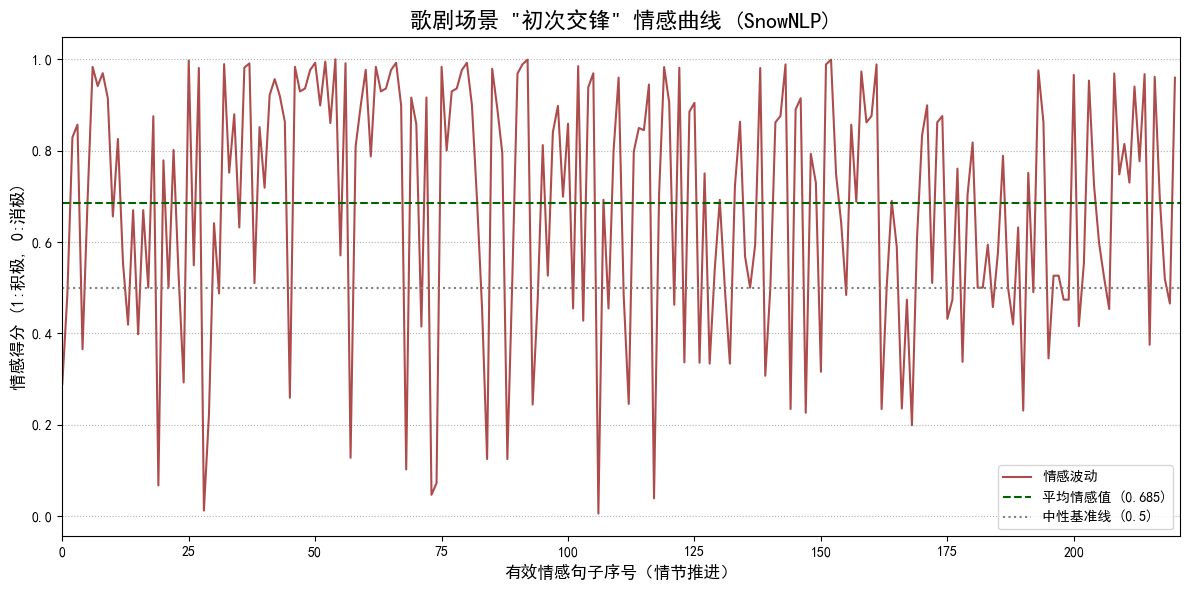


✅ 场景 '初次交锋' 情感分析结果：
   - 场景平均情感得分 (SnowNLP): 0.6852

▶️ 正在分析场景: 秘密败露 (文本长度: 1582 字)

✅ 图片已保存为: 歌剧_秘密败露.png


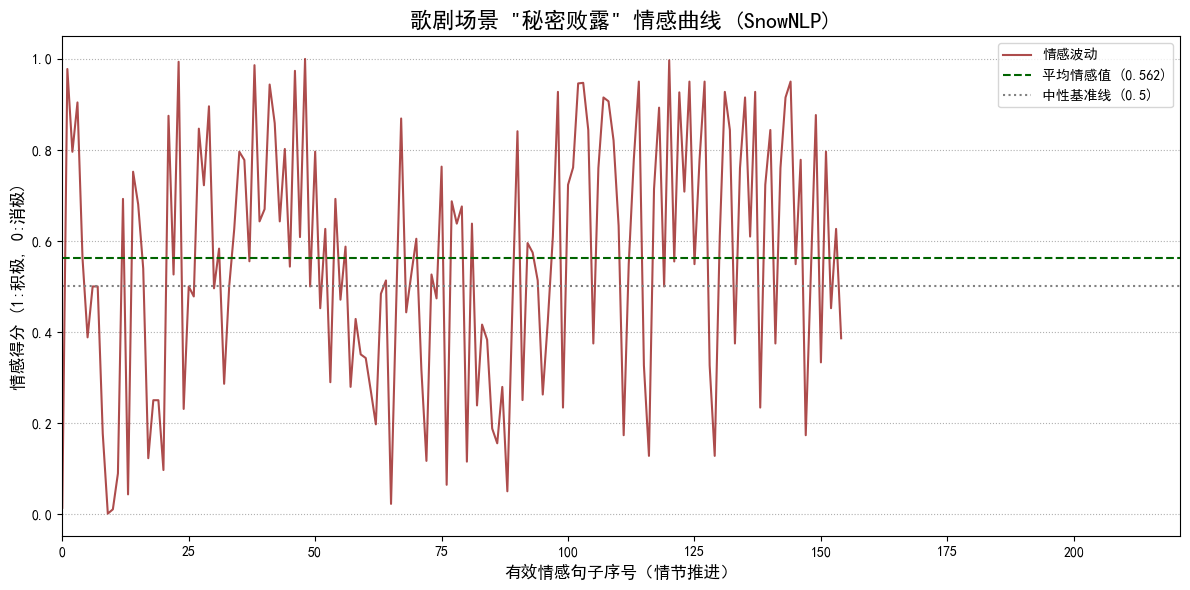


✅ 场景 '秘密败露' 情感分析结果：
   - 场景平均情感得分 (SnowNLP): 0.5619

▶️ 正在分析场景: 玛蒂尔德挽救 (文本长度: 396 字)

✅ 图片已保存为: 歌剧_玛蒂尔德挽救.png


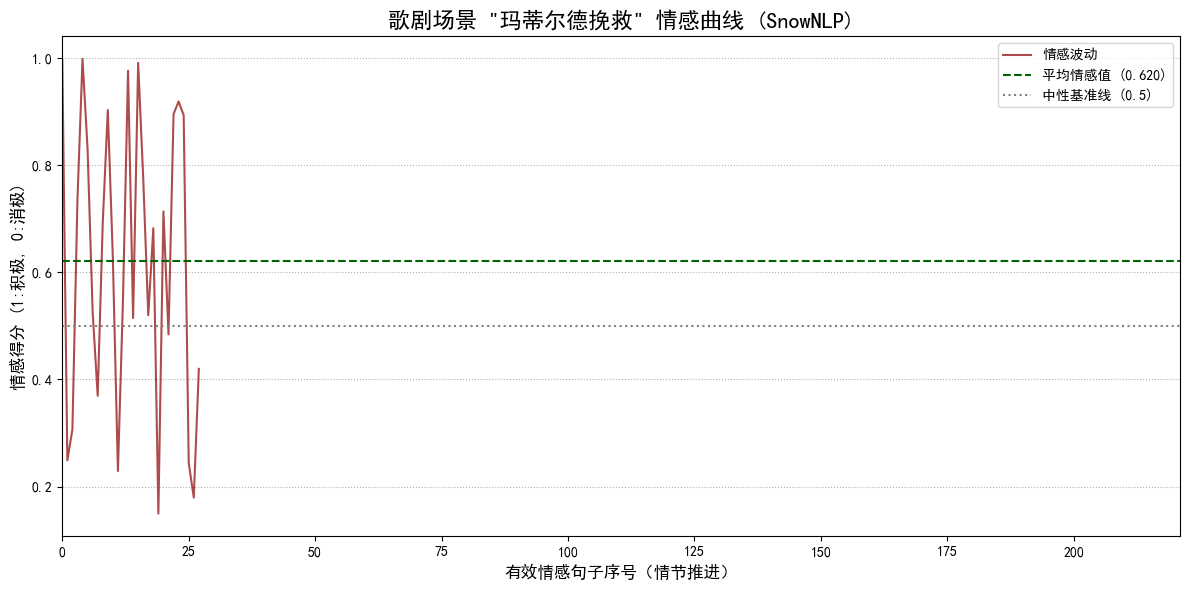


✅ 场景 '玛蒂尔德挽救' 情感分析结果：
   - 场景平均情感得分 (SnowNLP): 0.6202

✅ 场景情感分析结果已成功保存到文件: 歌剧_scene_sentiment_results.csv

--- 场景情感分析最终数据 ---
     场景名称  平均情感得分 (SnowNLP)
0    初次交锋            0.6852
1    秘密败露            0.5619
2  玛蒂尔德挽救            0.6202


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from snownlp import SnowNLP 

# ----------------------------------------------------
# 🚨 注意：将你的歌剧剧本内容赋值给 script_content 变量 🚨
# ----------------------------------------------------
script_content = """
杰罗尼莫：那个时代便是我们故事的开始
马上进入到那非红即黑的世界
红色如道道战沟中流淌的鲜血
黑色如送葬行列和沉重的祷言
准备好你的挽歌蓄满你的眼泪
生活对每个人的灵魂都是酷刑
天将降大任 天将降大任
现在是主动投身于深渊的时刻
爱情的表象向激情的煎熬变色
恐惧把我们每一天的行动鞭策
天将降大任 天将降大任
又有谁能明白心之可贵
充满爱的世间多么完美
却与人们的追求相违背
你瞧这正是问题的精髓
充满爱的世间多么完美
哪一天没有人设下重围
胆量够大世界任你高飞
听从你内心 听从你内心
那个时代沉湎于昔日主的荣光
法兰西还为如何书写未来彷徨
献身于高尚的事业乃义之所向
拥护王权还是高举革命的火把
选择阵营吧背负起相应的罪状
由理想引导的信仰是何其悲壮
天将降大任 天将降大任
在爱和死亡的夹缝中游走的你
这样方能体会何谓炽烈的感情
这两场战役的前线硝烟又燃起
天将降大任 天将降大任
又有谁能明白心之可贵

杰洛尼莫：蒙伯侬女士！茫茫人海中见到您，真是惊喜啊！您不记得我了吗？杰洛尼莫！不，我不是阿帕切的厨师，我是歌者，歌者杰洛尼莫！杰洛尼莫！伟大的歌唱家杰洛尼莫！您肯定知道我，不知道吗？这是什么世道！怎么这么快就把名人忘却！不过区区两个世纪以前，我的名声还响彻巴黎、贝桑松、利摩日的各大沙龙！这是什么世道！贵族、资产阶级和贱民能平起平坐，巴黎人和外省人相提并论，你们居然相安无事！我们那个时代非黑即白，或者说....是红与黑的！
杰洛尼莫：没错，我们来聊聊爱情吧！让我来给你们介绍德瑞纳夫妇。德瑞纳先生懂得爱情吗？德瑞纳先生，是大资本家，是杜河流域美丽小城维利叶的市长。德瑞纳夫人懂得爱情吗？她的爱不是给了上帝，就是给了她的孩子们。啊，爱情啊！在这伟大而浪漫的时代，爱情被感知、被争取、被幻想着，唯独不能被成全，千载难逢。然而爱情这个无赖总是偷偷摸摸地潜伏着，在不经意间浮现，毫不安分。
瑞那夫人：不行，我不同意。
德瑞纳先生：别再说了，这件事就这么定了。让自己的夫人亲自抚养孩子，这不符合我的身份地位。我们需要一个出色的教授，这是为了孩子好。
瑞那夫人：把孩子丢给那些尖酸刻薄的老教授，动不动为了拼错个单词就要打骂责罚，这对孩子有什么好？
德瑞纳先生：你真是会瞎想。满脑子都是孩子，把你累坏了吧？你太溺爱他们了。想想看那个暴发户瓦勒诺要是知道了我们有个出色的家庭教师，会是什么反应！
瑞那夫人：家庭教师……
德瑞纳先生：当然是家庭教师。爱丽莎？他应该快到了，瓦勒诺一家正好来了。我求你好好欢迎一下他们。
瓦勒诺：市长先生好。
德瑞纳先生：瓦勒诺先生好。
瓦勒诺：德瑞纳夫人好。
德瑞纳先生：瓦勒诺夫人好，德尔万夫人好。
瓦勒诺：市长先生，您的夫人真是越发容光焕发了。
德瑞纳先生：您的夫人也是日益光彩照人。对了，这是哪来的小混混？喂，你！肯定又是个想来泡我家女仆的小流氓，我一看就知道，你等着。你找谁？
于连：我找德瑞纳先生。
德瑞纳先生：我就是，你是？
于连：我叫于连・索雷尔，是您的家庭教师。
瓦勒诺：他就是你们的家庭教师？他不是木匠索雷尔的儿子么？
瓦勒诺夫人：木匠的儿子？
瓦勒诺：木匠的儿子当老师，可真有意思。他识字吗？
于连：是的，我不仅会读书写字，还能用拉丁文读写。
德瑞纳先生：那就请您背几句拉丁文来听听吧，来吧！
于连：好吧。夫人，我看您手上有一本圣经。随便抽一段话告诉我开头的几个词，我能接着背出来。
瑞那夫人：容忍那些孩子，不要禁止他们来……
瑞那夫人：爱丽莎？
爱丽莎：嗯...
瑞那夫人：爱丽莎？
爱丽莎：什么？噢！对不起夫人，对不起夫人。
瑞那夫人：你还在想着那个人是吗？
爱丽莎：谁？噢，你说他呀？怎么可能！他看都没看过我一眼。
瑞那夫人：我觉得于连心不在焉，懵懵懂懂的，一直沉浸在自己的世界里，可能你要表现得更明显一点。
爱丽莎：还怎么明显？我都对他笑脸逢迎、低头顺眉好久了，可连半句话都说不上，他什么反应都没有。难不成要我露着大腿，把我的嫁妆绑在腿上他才明白？对不起，我失礼了。
瑞那夫人：我帮你跟他说。
爱丽莎：哦，太感谢您了！
瑞那夫人：这件事很简单，于连跟你年纪相仿、家境相似，身体健康，又在同一个屋檐下工作，我想不出他不要你的理由。
爱丽莎：确实...除非他爱着别人？
瑞那夫人：爱丽莎，别轻易说爱不爱的，我们又不是活在小说里。
爱丽莎：好吧。
瑞那夫人：是时候 静等待 悉心描绘
妆点着 准备着 这是命运
结连理 做选择 合为一体
被俘虏 被诱惑 却更哀求
那魔鬼 这毒药 吞噬你我
被罚入地狱的永恒之火
我为期望中的孩子们妥协
早已将丈夫预先视作父亲
我愿献出生命只为与他在一起
看这我的乐园
谓我心底的时钟为何？
你所见是激情或理智？
心脏可按节拍跳动？
但这腹中所孕育为何？
强大过我们 掌控世界 
钟声所奏可是幸福？
爱人啊 这小说 我正猜想
看自己 正沉沦 一同想象
为渴望 所倾覆 于无边梦中
朋友啊 我一定 费心完成
这约定 于你我 无比珍贵
我愿信 这责任 已是承诺
我早已对占据我的魔鬼臣服
哦我主 是那美德使我战胜
但这能否带我们逃脱同一悲剧
由那时间预见
谓我心底的时钟为何？
你所见是激情或理智？
心脏可按节拍跳动？
但这腹中所孕育为何？
强大过我们 掌控世界 
钟声所奏可是幸福？
主啊 宽宥我们的过错
解放我们出苦难
自女人的试炼之中
我怕 不顾一切的放纵
震颤我身 再次沦陷
在这虚假乐园
在这虚假乐园……
谓我心底的时钟为何？叮
你所见是激情或理智？
心脏可按节拍跳动？
但这腹中所孕育为何？
强大过我们 掌控世界 
钟声所奏可是幸福？

瑞那夫人：于连？
于连：夫人？
瑞那夫人：我有事找你谈，借一步说话好吗？今天天气真不错...孩子们今天早上乖不乖？
于连：他们很乖，夫人。
瑞那夫人：那就好。我希望你没斥责他们吧？
于连：没有。
瑞那夫人：那就好，你真是很会带孩子。我刚还跟爱丽莎说呢，说你肯定会是一个好父亲，她很赞同我的说法，她也很会和小孩相处。哎，这个爱丽莎还是很不错的，烧得一手好菜，做得一手漂亮衣服，我这条裙子就是她给我做的。不知道多有福气的人才能娶到她。你知道爱丽莎非常敬重你吗？我很喜欢她，你呢？你觉得她怎么样？
于连：我觉得我们应该挺合适的，可惜我得完成我的使命。
瑞那夫人：你的使命？
于连：我想成为一名教士。
瑞那夫人：你要当教士？
于连：是的，夫人。
瑞那夫人：啊，好吧，这很好，我明白，我敬佩你的选择。可怜的爱丽莎，她要伤心了。不过没关系，你是对的，如果这是你的使命，那这就是最好的选择。以你的学识和记忆力，你肯定能成为一个很好的教士。
于连：对不起，请原谅我，请允许我退下。
瑞那夫人：于连？
于连：夫人？
瑞那夫人：你的像章里藏的是谁的肖像？
于连：我请求您让我保守住这个秘密。
德瑞纳先生：你在这儿呀！脸色这么苍白。你要是能好好装扮，还是一个挺美的女人的。涂点腮红能让你的脸颊更显气色，还可以在眼睛上用一些闪亮的蓝色眼影...你知道大家都说你什么吗？我不知道怎么说才能不冒犯你——说你是个平凡的女人。人家说，市长的夫人应该是优雅、精致的楷模。你知道我不在乎别人的闲言碎语，我也喜欢你本来的样子，但人家会说是我没钱不给你买新裙子。你穿的风格有点过时了，像10年代的，现在毕竟已经是1828年了！虽然维利叶只是个外省的小城市，但正因此，我们更应该过得体面！你看看瓦勒诺夫人，她刚置备了两匹诺曼底的大马，专门用来拉她的马车，这太张扬了！她肯定是故意的，肯定是嫉妒！嫉妒我有身份，嫉妒我雇佣了于连。这个小于连，真是我的一招妙棋！不过雇佣这么个农民，花费还是太贵了。
德瑞纳先生：豪宅大庄园 仆人成群
绣花小丝帕 藏在衣柜
荣华富贵
这才是真正重要的事
雕花银勺 厚厚的地契
东西越贵 身价才越高
显而易见
这才是真正重要的事
瑞那夫人：别活在 他人的眼中
每一步 该安守本分
最重要的是
我对你忠贞不渝
德瑞纳先生/瑞那夫人：我们的诺言 不能忘却
虚无的情感 不要放纵
以上天之名
我对你忠贞不渝
不假思索 说我愿意
不论未来 是祸是福
携手努力 为琴瑟和鸣
自我欺骗 也不为不可
德瑞纳先生：穿金又带银 大权在握
奉承又讨好 收买人心
华服白手套
地位相当的朋友
股票和债券
一个都不能少
瑞那夫人：不该丢弃 珍贵的感情
日夜祈祷 今日到永恒
小心翼翼 乐于服务
我们可敬的同盟
永不违抗誓言
为孩子全力以赴
德瑞纳先生/瑞那夫人：保持希望
我们永不分离
不假思索 说我愿意
不论未来 是祸是福
携手努力 为琴瑟和鸣
自我欺骗 也不为不可
彼此真诚
对婚姻 对生意
脱帽微笑
不犯错 不让步
一丝不苟 远见卓识
小心谨慎 秉直公正
好士兵 卫道士
互相扶持
永远关心
那最重要的事
不假思索 说我愿意
不论未来 是祸是福

德瑞纳先生：露易丝？露易丝？
瑞那夫人：是，我的朋友。
德瑞纳先生：你的神色真的不太好。
瑞那夫人：稍微有些头痛，肯定是太阳晒的。
德瑞纳先生：女人真是个复杂的机器，总有些部件出问题。爱丽莎？
爱丽莎：先生？
德瑞纳先生：于连，你这个样子是要去哪呀？
于连：先生，我趁着下午有空，正好去透透气。
德瑞纳先生：那你去透气吧，我的孩子，去吧。他肯定是看上谁家姑娘了，这种事情我一下子就能察觉到。
爱丽莎：先生？
瑞那夫人：我们要去树荫下喝一杯。
爱丽莎：好的，先生。
于连：空气，空气，空气……终于清净了！哦，主啊，饶恕我吧。我并不虔诚，却这般恳求您，但我要臣服于您！您在天上，什么都看得清楚，但这人世间一片混沌，我看不懂，也看不到您的圣光，除了露易丝眼睛里的光芒。她看我的眼神，好像看着宠物，我什么都不是。不，我不要和她的女仆在一起！我要她！她！露易丝！露易丝！我又在幻想什么呢？她还不知道我是谁！但她会看到的。我已经在人生的谷底了，没什么可失去的！哦，拿破仑，请你帮助我，鼓舞我！
于连：人们常告诫我 要安于现状
特权与优待 没有你的份
你出生的那张床 不许你好高骛远
人常嘲笑我 太放肆大胆
不论怎样努力 仍被以貌取人
卑躬屈膝 不要奢望 除了弯下脊梁 你再一无是处
各有其所 各安天命 已经感激不尽
低声下气 不得奋起 浑噩度过一生
要么生而为王 要么一文不名
然而为何仍在苦路上挣扎
我要荣耀向我俯首
征服世界或一无所有
小恩小惠 小权小利 无足轻重
要意乱情迷的伤口
掌控你们脖颈上的绳
不满足于 小恩小惠 蛊惑人心
旁人常轻视我 如同脚下粪土
背负父辈之名 只有残喘苟活
从中所学会的 仍是虔心祈祷
唯有告解 唯有乞求 从未触及天空
滞留原地 禁锢被缚 无法展翅翱翔
事事称阿门 到头一场空 反而诅咒加身
命运 法律 不能使我屈服
康庄大道 别再要我践行
我会承受你们的过错 钟爱自己面前的道路
永远埋葬在身后
你们眼中愚蠢的我
我要荣耀向我俯首
征服世界或一无所有
小恩小惠 小权小利 无足轻重
要意乱情迷的伤口
掌控你们脖颈上的绳
不满足于 
小恩小惠 蛊惑人心
我要荣耀向我俯首
征服世界或一无所有
小恩小惠 小权小利 无足轻重
要意乱情迷的伤口
掌控你们脖颈上的绳
不满足于 小恩小惠 蛊惑人心
瑞那夫人：于连？出什么事了？你在这干什么？
于连：夫人...我爱您！
瑞那夫人：嘘！别说了！放开我！你疯了吗？
于连：是的，夫人，为您疯狂。
瑞那夫人：快点离开，于连，快点离开！
于连：好，我走，永远离开，你再也不会有我的消息。
瑞那夫人：快走！否则我要叫我丈夫了。于连？于连？
于连：夫人？
瑞那夫人：你的像章里到底藏着谁的肖像画？
于连：我不能说。
杰洛尼莫：爱情啊！让雄狮变成羔羊，让圣人变成浪子。爱情...多么甜蜜，多么热烈！尤其是禁忌之爱、隐秘之爱，经年累月散发着花火。
美人 我曾聊表情意
你的魅力让我一见倾心
我不幸的灵魂被你救济
我心悸动难平
你呢？
好友 我可曾告诉你
我心中火炬总被你燃起
无论我如何试图去压抑
我身躁动不已
你呢？
每当我们两相依
尽欢娱 百无禁忌
百无禁忌
敢情 这都是
爱情这字眼惹的祸
对我说 别闪躲
言情剧里缠绵段落
可惜 着了魔
不开口能叫人发疯
能不能 再重播
言情剧里缠绵段落
谎言 可否让人忘记
那些不该出口的话以及
所有深印在脑海的夜里
激情突然来袭
和你
忍让 默默痛苦以为
宽容足以阻止背叛降临
无怨无悔地把自己献祭
服下禁断的毒
和你
然而当我在你怀里
这世间 再无清明
再无清明
敢情 这都是
爱情这字眼惹的祸
对我说 别闪躲
言情剧里缠绵段落
可惜 着了魔
不开口能叫人发疯
能不能 再重播
言情剧里缠绵段落
敢情 这都是
爱情这字眼惹的祸
对我说 别闪躲
言情剧里缠绵段落
你主宰我的命运
背弃了上帝只因我爱你
对你发誓 这一生这一世
沉迷这场游戏
你怎么说？

德瑞纳先生：露易丝？
瑞那夫人：天啊，你快躲起来。
德瑞纳先生：露易丝？
瑞那夫人：我来了。
德瑞纳先生：你把自己关起来干嘛？
瑞那夫人：我……
德瑞纳先生：你怎么了？
瑞那夫人：我有点头痛。
德瑞纳先生：头痛…女人真是复杂的机器。你还没更衣打扮？露易丝！我们要迟到了。
瑞那夫人：迟到？
德瑞纳先生：我们要去瓦勒诺家参加晚宴！你快点吧，维利叶的市长应该守时。你知道那个小于连在哪吗？
瑞那夫人：小…不知道。
德瑞纳先生：这次瓦勒诺又叫我们带着他去…我有时候感觉他们就是要邀请他去表演“猴戏”，拿腔拿调地咿呀呜啦，而我才是跟班。但我也有聪明才智啊。我给你讲个我刚学会的笑话：“将军夫人濒死之时，将军温柔地握着她的手。她说：‘亲爱的，我离世之前不得不跟你坦白，我在婚姻中曾出轨两次。’‘两次？’她丈夫说，‘这没什么大不了！是跟谁？’夫人回答：‘第一次是跟你的医生，第二次是跟你的整个炮兵团！’”于连？于连？
瓦勒诺：朋友们，请跟我来，我们去用餐吧。
德瑞纳先生：露易丝，你快点！
瓦勒诺：亲爱的小于连，我们都很想你啊！能不能给大家背几段圣经呀？要用拉丁文哦！
瓦勒诺夫人：是啊！来吧！背拉丁文！
于连：请原谅我，头有点痛，肯定是因为这嘈杂的声音。
瓦勒诺：什么声音？哦，囚犯们啊，老问题了。
瓦勒诺夫人：这些可怜人！都是拿破仑的拥护者。
瓦勒诺：就是没办法让他们闭嘴。
瓦勒诺夫人：连拷打他们也不行。
瓦勒诺：除非把他们的头都砍了才行。
瓦勒诺夫人：只有断头台，否则他们还要繁殖得更多呢！
瓦勒诺：我们都习惯了，我几乎都听不到了。对于这些人我必须忍着，毕竟我是穷人收容所所长，没办法，这是我的使命。
杰洛尼莫：瓦勒诺，你真是个圣人！
瓦勒诺：啊，杰洛尼莫！你们都认识杰洛尼莫吧！请您赏脸给我们唱首小曲吧，这样就能把那些噪音盖住了，这对我们敏感的客人来说太重要了！
杰洛尼莫：如您所愿！
杰洛尼莫：富人上了战场
士兵离开了战争
最简单的乐趣
打倒庸俗的平民和糟糕的品味
衣领别上鲜花
他们的目光要穷人
躲进泥土里
别倒人胃口
这世道 不该这样
这世道是个可耻的错误
我们所有的缺点
都丑的没有风度
他们高高在上的告诉我们
做富人真好（当个富人）
生在丝绸堆里（上好的丝绸）
财富傍身
幸福美满 仁义道德
无所畏惧
更好的岁月
黄金岁月
生儿育女
聪明漂亮
不费吹灰之力
穷人置身苦难中
阔佬们却不屑一顾
我们零落的人生
还不比不过他们小小的欲望
仰望上帝天父
以华服之名
他们虔诚向上帝天父祷告
还要祈祷生活更加甜美
他们 贪得无厌
穷人 一文不值
坦白说吧
你们就是次等生物
他们高高在上的告诉我们
做富人真好（当一个富人〕
生在丝绸堆里（上好的丝绸）
财富傍身
幸福美满 仁义道德
无所畏惧
更好的岁月
黄金岁月
生儿育女
聪明漂亮
不费吹灰之力
抢夺富人的面包
填饱肚子
多么庸俗
多没教养！
偷走富人的金钱
遮寒取暖
多么庸俗！
多没教养！
多么庸俗！
多没教养！
多么庸俗！
多没教养！
瓦勒诺：太棒了！
瓦勒诺：杰洛尼莫！唱得太好了！我还没听过这首歌，它出自哪里？
杰洛尼莫：不过是首老掉牙的歌了。
瓦勒诺：当然，当然。杰洛尼莫？
杰洛尼莫：嗯？
瓦勒诺：您献唱过各大贵族沙龙，杰洛尼莫是来自巴黎上流社会的艺术家！您认识所有人，所有有地位的人！您能不能带我融入那个圈子，把我引荐给几个男爵？
杰洛尼莫：亲爱的瓦勒诺先生，这是我的荣幸！我听说德拉莫侯爵正在找秘书，您感兴趣吗？
瓦勒诺：哈哈哈！杰洛尼莫！我们久仰德拉莫家族的名声，可我不确定他们的财富能多到让我去当秘书的程度。你们知道我们现在喝的酒有多贵吗？看我们的小于连的表情！这孩子话不多，不知道的还以为他只说拉丁文呢！
于连：我钦佩得说不出话来。
瓦勒诺：是吗？
于连：钦佩您管理穷人还能发财的本事！
杰洛尼莫：好极了！好极了！瓦勒诺，你识人的眼光真好！敬友谊！敬爱情！敬智慧！
德瑞纳先生：对了！你们听说过那个跟整个炮兵团出轨的女人的故事吗？没有？是这样的：一个将军温柔地拉着...
瑞那夫人：对不起，我有点头痛。
瓦勒诺：亲爱的夫人，那您去透透气吧。如果您想稍事歇息，旁边有个蓬巴杜厅，是照着真迹复制的，我陪您去。
瑞那夫人：不用了，谢谢。
德瑞纳先生：女人啊！哎，我说到哪了？哦对！一个将军，正临死...
瑞那夫人：我恳请你们原谅我，我头实在是痛！
德瑞纳先生：怎么还像传染病一样！一个将军，正临死...不不不，反过来，他的夫人正在临死...
瓦勒诺：夫人，您看起来有些不安。希望今晚我没说什么、做什么让您不开心的事，如果是我的错，我恳请您原谅我。您看起来很困扰，不知道我能做些什么，要知道您可以信任我，把我当作朋友...
瑞那夫人：谢谢您了。我没什么，只不过...我想是因为我的胸衣有点紧了。
瓦勒诺：我可以帮您松开一些，这样您就能呼吸顺畅了。啊，露易丝，您让我疯狂。
别人：尊敬的市长先生，我带着沉痛的心情告诉您这个消息：您的夫人跟于连・索雷尔有私情，就在您自己的屋檐下！我希望您能理智看待这件事，尽管它如此荒唐，而您又身处其中。我的消息来源非常可靠。
德瑞纳先生：豪宅大庄园，仆人成群！啊，爱丽莎，我看起来怎么样？这是新的市长绶带。爱丽莎？
爱丽莎：在，先生？
德瑞纳先生：去把德瑞纳夫人找来，立刻去！她怎么可能...露易丝，居然跟个农夫的儿子...我要赶走他们！我要把他们俩都赶走，像赶...我要赶走他们！我要把他们俩都赶走，像赶...哦，不行，如果他们一起逃走，报纸上又要议论个没完了！保持冷静，我要杀了她！我的名誉不会受损，法律也会站在我这边，但她姨妈的遗产怎么办？就快到手了！她要是就这么死了就好了！她怎么能对我做出这种事？她跟我在一起什么都不缺，我不懂！等着瞧吧！他们等着瞧吧！我不会任这脏水泼到我身上！我要让他们瞧瞧我是谁！这就是问题所在！
我谦卑地承认
为了权势恩惠
我装模作样
表面善交
内心不齿
口是心非
虚伪做作 却受益匪浅
哗众取宠 但充满真诚
微笑不语
闷声发你们的大财
小道消息
也能卖出价值连城
仁义道德
让你们迷失
背信弃义
成就我的非凡
我是懦夫 又怎样?
你看不见时
我默默强大
权谋是我的天赋异禀
是 我是懦夫
被无尽的悔恨吞噬
我才不要立什么牌坊
只要微笑着跟随欲望
我已沉沦
走进无尽财富的天堂 / 在无尽财富的天堂
狼吞虎咽
你要我怎么改变
习惯了旁门左道
说谎更不假思索

德瑞纳先生：露易丝...露易丝
瑞那夫人：你叫我？
德瑞纳先生：拿去！自己看！
瑞那夫人：厚颜无耻！立刻把于连索雷尔给我叫过来！他怎么敢！这农夫的儿子！不知天高地厚！竟敢诽谤我这样的女人！
德瑞纳先生：你
瑞那夫人：你别说了，我什么都不想听！有人要毁了我的名誉，你的名誉也要受损的！我早就告诉过你了！我们要什么家庭教师！不过是个到处吹嘘自己勾引市长夫人的无赖！他以为自己是谁？我要你马上把他送回他的田野里去。你要果断点啊！我们不能让这种老鼠屎坏了我们的粥。您来啦。索雷尔先生，我们不得已要跟您分别了。其中缘由我想您自己清楚。今天早上就请您收拾您的物品，我不想再见到您。永远也不要。快点！让我们摆脱这个...农夫。我不想再忍受她了。快点！把他的工钱结了。这个月的都给他！
德瑞纳先生：但...
瑞那夫人：别让他有理由说我们小气。结了他的工钱，送他回农场。等等...不！恰恰相反，别再给他机会玷污你的名声。应该把他送的远远的。要么送去巴黎吧。拉莫尔侯爵不是正在找秘书吗？那就把他推荐去当秘书吧！这样我们就能避免这桩对你的诽谤了！去吧！现在让我一个人待一会！于连...于连。
热情已经消散
仇恨尚在雏形
承诺都被抹去
誓言渐渐淡去
心间疼痛消散
天上没有一丝光亮
消逝的光辉
强加的虚饰
暴露于欲望之下
时间抨击着
被撕裂的伪装
背叛的思想变得模糊不清
随意弄错的梦
尚未筑成
漆黑中我看到一抹艳红
痛苦如此难熬
当阴影接踵而来
残酷鄙俗中我看到了希望与激情
抹掉使我
狂怒的侮辱
你形象的明暗对比
是构图的不公
我们的清晨
在没有未来的黑夜中降临
褪色的画面
在博物馆将我吞噬
悔恨萦绕浸没我周身
残酷鄙俗中我看到了希望与激情
痛苦如此难熬
当阴影接踵而来
残酷鄙俗中我看到了希望与激情
抹掉使我
狂怒的侮辱
热情已经消散
仇恨尚在雏形
强加的虚饰
暴露于欲望之下
时间抨击着
被撕裂的伪装
热情已经消散
仇恨尚在雏形
承诺都被抹去
誓言渐渐淡去
强加的虚饰
暴露于欲望之下
时间抨击着
被撕裂的伪装
残酷鄙俗中我看到了希望与激情
痛苦如此难熬
当阴影接踵而来
漆黑中我看到一抹艳红
忘掉背叛
我激情的色彩
在暗夜中耀眼
你要我怎么改变
习惯了旁门左道
说谎更不假思索

于连：她以为能把我丢掉，像个玩腻了的旧玩具。 连个解释都不给。她以为能用秘书职位买下我的缄口不语。可我不是个物品！金钱买断不了一个一无所有的人。我要向她证明我比她更有价值，她这个大资产家。我也许渺小，但绝不低贱！我什么都不会说，永远不！我连想都不会再想她！删除她，忘记她。结束了。再也不碰女人，再也不会动情我心已碎。碎了更好。我再也不会被它左右了
晚上好，您好吗？
天气真好不是吗？
今年冬天一点也不冷
这些客套话
那我发会呆吧
你继续说，我打个盹
大家都没其他好说的
来唤醒欲望
啊，好无聊，好无聊，这些优雅的人儿
他们爱我也让我厌倦
到无以复加
好无聊，好无聊，所有这些佳偶
礼貌之下
毫不高贵
他们觉得要说话得体
不会跟我说他们的所思所想
我的价值
和我的付出对等吗？
尽说些舞会的破事
继续说啊，很有趣（此处为客套话）
我很清楚他们期望什么
在各种礼节的背后
啊，好无聊，好无聊，这些美丽的人儿
他们爱我也让我厌倦
无以复加
好无聊，好无聊，...

瓦勒诺：这个粪坑里生出来的小毛头，等着瞧吧。我会把他踢回粪坑去的！很快！快到他不敢想象我还押上韵了。尊敬的侯爵先生，我是来自小城维利叶的穷人收容所所长。 
拉穆尔侯爵：维利叶，一定是小于连的朋友吧！ 
瓦勒诺夫人：他可喜欢我们了我得向您提个不情之请，我们目前重修孤儿院差了好多钱，不得不来请求您慷慨解囊，让我们孤儿院的孩子们能够这些事就直接找我的秘书兼财务索雷尔先生吧。我一看到数字就头大。失陪了。 
瓦勒诺：看到数字就头大？我看是钱多烧着了那就让我来排忧解难！ 
玛娣儿特：先生您好！ 
于连：小姐好！我能为您做些什么？ 
玛娣儿特：我找不到维利写的法国诗了。 
于连：在这里 
玛娣儿特：你能向我推荐一些有意思的书吗？整个藏书阁您都了如指掌 
于连：当然！我向您推荐拉风丹寓言 
玛娣儿特：不必了。 
于连：是不是太深刻了？ 
玛娣儿特：你有拿破仑的书推荐吗？要知道我已经读过了，圣赫勒拿到回忆录和战争论， 
于连：你读过，你在服丧？ 
玛娣儿特：我的确读过这些作品！崇敬伟大的人物，不论他们政见如何，我在为我们家族最伟大的人服丧。博尼法斯.德拉莫今天是他的祭日。 
于连：他都死了300年了！那又如何？我要纪念他，每一年都要回顾他的事迹！ 
于连：他就是因为背叛皇帝而被砍头的那个人吗？他更是个勇敢的楷模，一个英雄。也是那个时代最英俊的男子！ 
玛娣儿特：《与您相伴的时光》 
于连：什么？ 
玛娣儿特：我没有生在那个时代，今日已经没有真正的伟人了，拿破仑根本比不上 
于连：拿破仑比不上？他让整个法兰西重获骄傲！玛蒂尔德：什么骄傲，他是个实实在在的自大狂小矮子。吃香喝辣，最后安地老死在自己的床上！于连·惨烈的死亡就能抬高人的身价？那你要是死了，是不是也更值钱？ 
玛娣儿特：你在威胁我吗？ 
于连：我祈求您的原谅。 
玛娣儿特：凌晨1点到花园来，到井旁取花匠的梯子，靠在我房间的窗台上爬进来，我有话跟你说。 
于连：她们把我当猎物吗 不停盘旋在我身旁 她们到底要什么 她们到底要什么 要我服下剧毒吗 这些蛇蝎美人 她们到底要什么 她们到底要什么 她们挑衅我的软弱 残存的理智 放过我 放过我！ 远离她们 我的理想 飞得更高 飞得更高 远离她们 我得已保命 重新呼吸 重新呼吸 远离她们 远离她们 要把我放在巢穴里吗？ 来填满她们的胃口 她们到底要什么 她们到底要什么 这些雌性败坏了 动物世界的法则 她们到底要什么 她们到底要什么 
她们的爱若即若离 不过是猎人的诡计 放过我 放过我 远离她们 我的理想 飞得更高 飞得更高 远离她们 我得已保命 重新呼吸 重新呼吸 远离她们！ 呼吸 呼吸 远离她们 远离她们 呼吸 呼吸 远离她们 我的理想 远离她们 我得以保命 远离她们 我的理想 飞得更高 飞得更高 远离她们 远离她们 玛娣儿特：你在找什么吗？ 
于连：没有你的房间很不错。 
玛娣儿特：谢谢你在颤抖。 
于连：我没有颤抖，只不过打个寒颤。 
玛娣儿特：今天整个下午天气都很棒，但晚上还是很凉。 
于连：是啊，但这些霜寒之夜预示着一个繁盛的春天！ 
玛娣儿特：当然，夏天也一定温柔怡人。你把我当什么人？！ 
于连：我以为... 
玛娣儿特：你以为什么？ 
于连：以为你对我...那这幽会！ 
玛娣儿特：不错，但我改变主意了。女人很多变的，晚安吧，先生！请从窗户出去。他跟别人一样，甚至还是个穷光蛋。 
玛娣儿特/于连：本该知足 他若即若离的距离 本该知足 他口是心非的话语 雾里看花 看我们之间不解的谜 我已知足 曾轻率大胆地试探 我已知足 坦露我冷漠的内心 让她疑心重重 让她心灰意冷 我是你的谁 你为何喜欢...

有其父 必有其女 我为你编织一场梦境 瑰丽未来愿你不会醒 家族姓氏照耀你一生 你永远 别想抹去 我期望的他乃一位人中英豪 能在我走之后真正让你过得好 做你的依靠 会珍藏 你微笑 而你 最好 听仔细 所有付出 再付出也于事无补 当你不再需要为父的指引 所有怨气 随我们的亲情远离 若你宁愿选择陌生人陪你 所有付出于事无补 你得知道 所有付出 我的付出于事无补 当你不再需要为父的指引 所有怨气 随我们的亲情远离 若你坚持那我只好放弃你 可是只要我还没咽气 我的孩子我守护到底 我总会原谅你的一切 我的心肝 我骨血 玛娣儿特：父亲，不要，除非你先杀了我！ 
瑞那夫人：侯爵先生，处于神圣的宗教信仰以及道德义务，我必须忍痛告诉您，,于连-索雷尔先生是一个毫无宗教准则的人，他成功的手段，就是勾引一家中最有影响力的女人，披着不问世事的羊皮，念上几句拉丁语，他唯一的野心其实就是摆布一家之主，得到他的财富。 
玛娣儿特：亲爱的，昨天带给你水果吃了吗？你得吃饭，才能恢复体力。明天！明天就要面对审判员了。你别担心，律师跟我说他很有信心，他会为你辩护，你不过是荣誉受辱而一时冲动。这也是事实，我也会为你作证。于连？你怎么不听我说话
于连：恩？恩，很好，就听你的。
玛娣儿特：我还私下见过陪审团主席，他会站在我们这边的。
于连：玛蒂尔德，你花了多少钱？！
玛娣儿特：钱不重要！审判就是场战争，我们必须要赢。想想我肚子里的孩子。
于连：一场只有一个受害者，却万劫不复的战争。
玛娣儿特：别说了！别再自怨自艾了！的确是有受害者，可却没有人死亡。我还没跟你说，她没死，她还活着。
于连：她还活着？玛蒂尔德？
玛娣儿特：于连，德瑞纳夫人还活着。我得走了，我的天使，相信我。
于连：露易丝死了，世界崩塌，而露易丝活着，是爱情在对我谴责（唱）
法官：现在请辩方发言，有请
于连：请您允许我来为自己辩护
法官：那就请...
"""
# ----------------------------------------------------

# --- 1. 设置绘图参数 ---
# 设置中文显示，防止 Matplotlib 乱码
plt.rcParams['font.sans-serif'] = ['SimHei', 'FangSong'] 
plt.rcParams['axes.unicode_minus'] = False 

# --- 2. SnowNLP 情感计算函数 ---
def calculate_sentence_sentiment_snownlp(text):
    """使用 SnowNLP 计算情感得分 (0 到 1 之间)"""
    if not text: 
        return None
    s = SnowNLP(text)
    return s.sentiments

# --- 新增：预计算所有场景的有效句子数，确定最大x轴范围 ---
def get_all_scene_scores(scene_markers, script_content):
    """遍历所有场景，获取每个场景的情感得分列表，同时返回最大句子数"""
    all_scores = {}
    max_sentence_num = 0
    for scene_name, markers in scene_markers.items():
        start_index = script_content.find(markers['start'])
        end_index = script_content.find(markers['end']) + len(markers['end'])
        if start_index == -1 or end_index == -1:
            all_scores[scene_name] = []
            continue
        # 提取场景文本并切分句子
        scene_text = script_content[start_index:end_index]
        sentences = re.split(r'[。？！；\n]', scene_text)
        scores = []
        for sentence in sentences:
            if sentence.strip():
                score = calculate_sentence_sentiment_snownlp(sentence.strip())
                if score is not None: 
                    scores.append(score)
        all_scores[scene_name] = scores
        # 更新最大句子数
        if len(scores) > max_sentence_num:
            max_sentence_num = len(scores)
    return all_scores, max_sentence_num

# --- 3. 分析、绘图并保存函数 (新增max_x参数控制横坐标范围) ---
def analyze_and_plot_scene(scene_name, text, max_x):
    """分析文本情感并绘制曲线，保存为PNG文件，横坐标固定为0到max_x。"""
    if not text or len(text) < 50:
        print(f"无法分析场景 '{scene_name}'，文本太短或为空。")
        return None

    # 按句切分
    sentences = re.split(r'[。？！；\n]', text) # 额外添加 \n 来更好地处理剧本换行
    scores = []
    
    for sentence in sentences:
        if sentence.strip():
            score = calculate_sentence_sentiment_snownlp(sentence.strip())
            if score is not None: 
                scores.append(score)
    
    if not scores:
        print(f"场景 '{scene_name}' 中未分析到任何有效句子。")
        return None

    avg_score = np.mean(scores)
    
    # 绘图可视化 (核心修改：设置x轴范围为0到max_x)
    plt.figure(figsize=(12, 6))
    plt.plot(scores, label='情感波动', color='darkred', alpha=0.7)
    plt.axhline(avg_score, color='darkgreen', linestyle='--', label=f'平均情感值 ({avg_score:.3f})')
    plt.axhline(0.5, color='gray', linestyle=':', label='中性基准线 (0.5)')
    
    # 固定横坐标范围
    plt.xlim(0, max_x)
    
    plt.title(f'歌剧场景 "{scene_name}" 情感曲线 (SnowNLP)', fontsize=16)
    plt.xlabel('有效情感句子序号（情节推进）', fontsize=12)
    plt.ylabel('情感得分 (1:积极, 0:消极)', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle=':')
    plt.tight_layout()
    
    # 🚨 关键步骤：保存图片文件
    image_filename = f"歌剧_{scene_name}.png"
    plt.savefig(image_filename, dpi=300) # 保存为 PNG 格式，300dpi 确保高分辨率
    print(f"\n✅ 图片已保存为: {image_filename}")
    
    plt.show() # 在 Notebook 中显示图表
    
    print(f"\n✅ 场景 '{scene_name}' 情感分析结果：")
    print(f"   - 场景平均情感得分 (SnowNLP): {avg_score:.4f}")
    
    return avg_score 

# --- 4. 文本提取主流程 ---

# 定义三个冲突场景的起始和结束文本标记
scene_markers = {
    '初次交锋': {
        'start': "于连：我找德瑞纳先生。", 
        'end': "不满足于 小恩小惠 蛊惑人心"
    },
    '秘密败露': {
        'start': "别人：尊敬的市长先生，我带着沉痛的心情告诉您这个消息：您的夫人跟于连・索雷尔有私情，就在您自己的屋檐下！", 
        'end': "于连：她以为能把我丢掉，像个玩腻了的旧玩具。"
    },
    '玛蒂尔德挽救': {
        'start': "玛娣儿特：亲爱的，昨天带给你水果吃了吗？", 
        'end': "法官：那就请..."
    }
}

scene_results = [] 
print("--- 第一步：预计算所有场景的有效句子数，确定统一横坐标范围 ---")

# 预计算所有场景得分和最大句子数（核心步骤）
all_scene_scores, max_sentence_num = get_all_scene_scores(scene_markers, script_content)
print(f"✅ 所有场景中最大有效句子数：{max_sentence_num}，将以此为统一横坐标上限")

print("\n--- 第二步：提取关键冲突场景文本并进行情感分析 ---")

try:
    for scene_name, markers in scene_markers.items():
        start_index = script_content.find(markers['start'])
        end_index = script_content.find(markers['end']) + len(markers['end'])

        if start_index == -1 or end_index == -1:
            print(f"❌ 警告：无法在剧本中找到场景 '{scene_name}' 的完整标记。跳过。")
            continue
            
        # 提取场景文本
        scene_text = script_content[start_index:end_index]
        
        print(f"\n▶️ 正在分析场景: {scene_name} (文本长度: {len(scene_text)} 字)")
        
        # 分析、绘图并返回得分（传入统一横坐标上限max_sentence_num）
        avg_score = analyze_and_plot_scene(scene_name, scene_text, max_sentence_num)
        
        if avg_score is not None:
            scene_results.append({
                '场景名称': scene_name,
                '平均情感得分 (SnowNLP)': round(avg_score, 4),
            })

    # --- 5. 结果汇总 (可选，但推荐) ---
    if scene_results:
        results_df = pd.DataFrame(scene_results)
        output_csv_file = '歌剧_scene_sentiment_results.csv'
        results_df.to_csv(output_csv_file, index=False, encoding='utf_8_sig') 
        print(f"\n✅ 场景情感分析结果已成功保存到文件: {output_csv_file}")
        
        print("\n--- 场景情感分析最终数据 ---")
        print(results_df)

except Exception as e:
    print(f"\n❌ 运行过程中发生错误: {e}")